
*   Deep Learning 
*   Problem - Binary Classification
*   Dataset - Hotel Cancellation Prediction
*   Model - Created by own (CNN)
*   Major Tools - Google Colab (Jupyter Notebook, Tensorflow, Keras)


Import libraries

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
drive_path = '/content/drive/MyDrive/CV/'

Read dataset using pandas

In [20]:
# link for dataset - https://www.kaggle.com/aayushaswal/hotel-cancellation-prediction/data

pd.pandas.set_option('display.max_columns',None) # Displays all columns of dataframe
hotel = pd.read_csv(drive_path + 'hotel.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#hotel.describe()
#hotel.info()
hotel.shape #(rows, columns)

(119390, 32)

Separate feature variables(inputs) ie X and Target variables(output) ie y

In [5]:
X = hotel.copy()
y = X.pop('is_canceled')

print(X.shape)
print(y.shape)

(119390, 31)
(119390,)


Preprocessing

In [6]:
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

X and y after preprocessing

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(89542, 63)
(89542,)
(29848, 63)
(29848,)


Define number of inputs

In [8]:
input_shape = [X_train.shape[1]]

Create or import model

In [9]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 63)               252       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               16384     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

Compile model - define optimizer, loss and matric

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [12]:
checkpoint_path = drive_path + 'weights.h5' 
logger_path = drive_path + 'logger.csv'

Checkpoint will save only best weights which gave best accuracy and define logger file


In [13]:
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                              mode="max",
                              save_best_only=True,
                            )

logger = CSVLogger(logger_path, append=True, separator=',')

Early stopping of below parameters says/meaning : "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 5 epochs, then stop the training and keep the best model you found." (To avoid overfittitng)

In [35]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

Run model for training

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping,checkpoint,logger],
)

Epoch 1/200
175/175 [==============================] - 3s 19ms/step - loss: 0.3367 - binary_accuracy: 0.8454 - val_loss: 0.3515 - val_binary_accuracy: 0.8375
Epoch 2/200
175/175 [==============================] - 3s 17ms/step - loss: 0.3385 - binary_accuracy: 0.8446 - val_loss: 0.3527 - val_binary_accuracy: 0.8387
Epoch 3/200
175/175 [==============================] - 3s 16ms/step - loss: 0.3349 - binary_accuracy: 0.8455 - val_loss: 0.3512 - val_binary_accuracy: 0.8384
Epoch 4/200
175/175 [==============================] - 3s 16ms/step - loss: 0.3347 - binary_accuracy: 0.8467 - val_loss: 0.3514 - val_binary_accuracy: 0.8393
Epoch 5/200
175/175 [==============================] - 3s 17ms/step - loss: 0.3352 - binary_accuracy: 0.8461 - val_loss: 0.3508 - val_binary_accuracy: 0.8387
Epoch 6/200
175/175 [==============================] - 3s 19ms/step - loss: 0.3338 - binary_accuracy: 0.8462 - val_loss: 0.3529 - val_binary_accuracy: 0.8374


Print graph

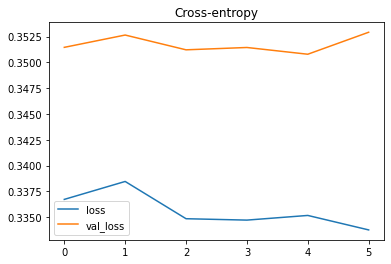

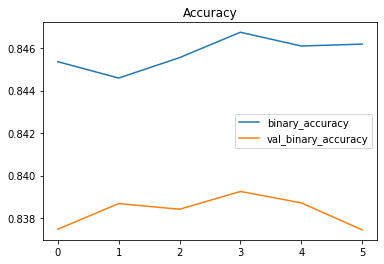

In [38]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [39]:
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print("Validation accuracy: {}".format(history_df['val_binary_accuracy'].max()))

Minimum validation loss: 0.35079455375671387
Validation accuracy: 0.839252233505249


Load best saved weights

In [14]:
model.load_weights(checkpoint_path)

Evaluate model / Testing model

In [15]:
loss, acc = model.evaluate(X_valid, y_valid)
print("Model accuracy: {:5.2f}%".format(100 * acc))

933/933 [==============================] - 2s 2ms/step - loss: 0.3167 - binary_accuracy: 0.8543
Model accuracy: 85.43%


Prediction of model

In [23]:
predictions = model.predict(X_valid)

# Convert prediction into classes for binary classification, if prediction more than 0.5 then 1 or 0
predictions = (predictions > 0.5).astype("int32")

Verify prediction

In [24]:
select_ip = 1000

print(f'Prediction of Given Input : {predictions[select_ip]}')
print(f'Actual label of Given Input : {y_valid.values[select_ip]}')

if predictions[select_ip] == y_valid.values[select_ip]:
  print(f'Predicted Correctly')
else:
  print(f'Predicted Incorrectly')

Prediction of Given Input : [0]
Actual label of Given Input : 0
Predicted Correctly
